In [37]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
import os.path as path
import wget
import random
from tqdm import tqdm
from scipy.stats import norm

In [2]:
!rm data.dat
file = 'data.dat'
url = 'https://raw.githubusercontent.com/asegura4488/DataBase/main/MetodosComputacionalesReforma/Matematicas.txt'
if not path.exists(file):
    Path_ = wget.download(url,file)
    print('--- File loaded ---')

--- File loaded ---


In [3]:
data = np.loadtxt(Path_)
data = np.array(data)

In [4]:
mean1 = np.mean(data)
print(mean1)

75.25


In [5]:
mean2 = np.percentile(data,50)
print(mean2)

75.0


In [6]:
# Necesitamos calcular las frecuencias en un histograma
bins_ = np.arange(50,99,4)
print(bins_)

h, bins = np.histogram(data,bins=bins_)
w = np.diff(bins) # Ancho de clase
print(h)

[50 54 58 62 66 70 74 78 82 86 90 94 98]
[ 1  1  6  9  7  9 16 10  7  6  3  5]


<BarContainer object of 12 artists>

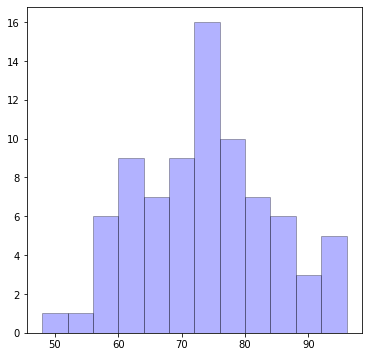

In [7]:
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(1,1,1)
ax.bar(bins[:-1],h,color='b',width=w,ec='k', alpha = 0.3)

# Calculando la distribución acumulada

In [8]:
def GetCumulative(h):
    
    cum = np.zeros( len(h) +1 )
    cumprob = np.zeros( len(h) +1 )
    
    integral = np.sum(h)
    
    temp = 0.
    
    for i in range(len(h)):
        
        temp += h[i]
        
        cum[i+1] = temp
        cumprob[i+1] = temp/integral
        
    return cum, cumprob

In [9]:
cum, cumprob = GetCumulative(h)

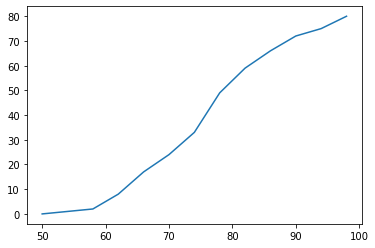

In [10]:
plt.plot(bins_,cum)

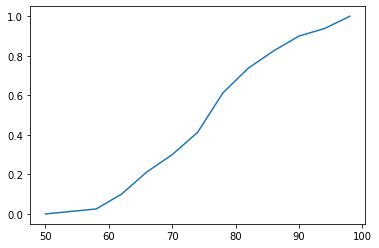

In [11]:
plt.plot(bins_,cumprob)

In [12]:
for i in range(len(cum)):
    print(i,cum[i],cumprob[i],bins_[i])

0 0.0 0.0 50
1 1.0 0.0125 54
2 2.0 0.025 58
3 8.0 0.1 62
4 17.0 0.2125 66
5 24.0 0.3 70
6 33.0 0.4125 74
7 49.0 0.6125 78
8 59.0 0.7375 82
9 66.0 0.825 86
10 72.0 0.9 90
11 75.0 0.9375 94
12 80.0 1.0 98


In [13]:
ii = cumprob >= 0.4
jj = cumprob <= 0.6

mean3 = bins_[ (ii & jj) ]

print(mean3)
# Este es el más cercano, sin embargo con la distribución acumulada solo podemos decir lo siguiente
# mean3 > 74 y mean3 < 78

[74]


# Bootstrapping

In [30]:
# Debemos tomar toda la poblacion como muestra
def GetMean(p):
    
    m = random.choices(p,k=len(p))
    
    return np.mean(m)

In [31]:
def GetSample(p, Npoints = 1000):
    
    lmean = []
    
    for i in tqdm(range(int(Npoints))):
        lmean.append(GetMean(p))
        
    return lmean

In [32]:
l = GetSample(data, Npoints = 100000)

100%|██████████| 100000/100000 [00:03<00:00, 27694.73it/s]


In [33]:
def GetHisto(l, Nbins=50):
    
    x = np.linspace(np.min(l),np.max(l),Nbins)
    h, bins = np.histogram(l, bins=x)
    w = np.diff(bins)
    
    I = np.sum(h*w)
    hnorm = h/I
    
    return h,hnorm,bins,w

<BarContainer object of 49 artists>

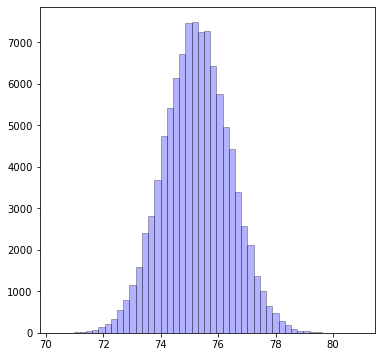

In [34]:
h, hnorm, bins, w = GetHisto(l)
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(1,1,1)
ax.bar( bins[:-1]+0.5*w[0], h, color='b', width=w, ec='k', alpha = 0.3 )

In [35]:
# Ahora hacemos un fit gaussiano
mu, sigma = norm.fit( l )
y = norm.pdf(bins, mu, sigma)

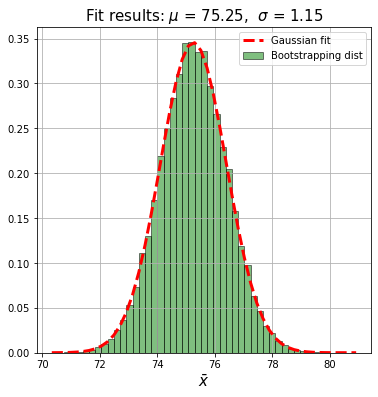

In [45]:
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(1,1,1)
ax.grid()
#ax.hist( listas[4], bins=bins, density = True, alpha = 0.6, color='g' )

ax.bar( bins[:-1]+0.5*w[0], hnorm, color='g', width=w, ec='k', alpha=0.5, label='Bootstrapping dist')
ax.plot( bins, y , 'r--', linewidth = 3, label='Gaussian fit' )

title = r"Fit results: $\mu$ = %.2f,  $\sigma$ = %.2f" % (mu, sigma)
ax.set_title(title, fontsize=15)
ax.set_xlabel(r'$\bar{x}$', fontsize=15)
ax.legend(loc=0)

In [49]:
cum, cumprob = GetCumulative(h)

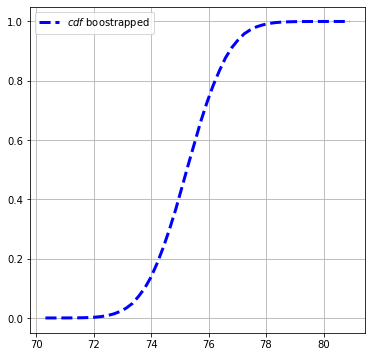

In [52]:
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(1,1,1)
ax.grid()

ax.plot(bins,cumprob, 'b--', linewidth = 3 ,  label=r'$cdf$ boostrapped')
ax.legend(loc=0)

In [55]:
ii = cumprob >= 0.45
jj = cumprob <= 0.55

mean4 = bins[ (ii & jj) ]

print(mean4)

[75.29464286]
